# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
#import dependecies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import requests
import json
from citipy import citipy
from pprint import pprint
import os
import datetime as dt

#import API keys
from api_keys import g_key, weather_api_key

#output file path for data resource files and figures
outputFilePath = os.path.join("Output-Data")

## Generate Cities List

In [13]:
#(latitude, longitude)
#latitude (-90,90) degrees South --> North
#longitude (-180,180) degrees West --> East

#increase the size from 100 to much larger once done checking this step
rnd_lng = np.random.uniform(-180,180,2000)
rnd_lat = np.random.uniform(-90,90,2000)

citiesCreate_df = pd.DataFrame({"Latitude":rnd_lat,
                          "Longitude":rnd_lng})
citiesCreate_df

,Latitude,Longitude
0,66.350533,56.074969
1,81.843591,-83.061084
2,-51.091496,68.864019
3,76.418265,5.299992
4,71.033443,24.677327
...,...,...
1995,-29.237871,-21.531500
1996,57.931134,44.498198
1997,19.277110,-142.762352
1998,54.009475,-97.802585


In [14]:
#create empty lists
city = []
country = []

for i in range(0,len(citiesCreate_df['Latitude'])):
    #find nearest city
    city_current = citipy.nearest_city(citiesCreate_df.iloc[i]['Latitude'],citiesCreate_df.iloc[i]['Longitude']).city_name
    city.append(city_current)
    #find country of city
    country_current = citipy.nearest_city(citiesCreate_df.iloc[i]['Latitude'],citiesCreate_df.iloc[i]['Longitude']).country_code
    country.append(country_current)

#add them to the cities_df
citiesCreate_df['City'] = city
citiesCreate_df['Country'] = country
citiesCreate_df

,Latitude,Longitude,City,Country
0,66.350533,56.074969,usinsk,ru
1,81.843591,-83.061084,qaanaaq,gl
2,-51.091496,68.864019,saint-philippe,re
3,76.418265,5.299992,barentsburg,sj
4,71.033443,24.677327,havoysund,no
...,...,...,...,...
1995,-29.237871,-21.531500,jamestown,sh
1996,57.931134,44.498198,manturovo,ru
1997,19.277110,-142.762352,hilo,us
1998,54.009475,-97.802585,thompson,ca


In [15]:
#remove duplicates
cities_df = citiesCreate_df.drop_duplicates("City", keep="first")
cities_df

,Latitude,Longitude,City,Country
0,66.350533,56.074969,usinsk,ru
1,81.843591,-83.061084,qaanaaq,gl
2,-51.091496,68.864019,saint-philippe,re
3,76.418265,5.299992,barentsburg,sj
4,71.033443,24.677327,havoysund,no
...,...,...,...,...
1982,13.919298,-76.835088,puerto colombia,co
1986,3.904313,-43.694758,carutapera,br
1988,-41.163691,23.372498,plettenberg bay,za
1989,52.932445,16.491067,czarnkow,pl


In [16]:
#reindex the list
cities_df = cities_df.reset_index(drop=True)

#new length
len(cities_df)

766

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
#weather api information
# api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
url_currentWeather = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#set lists for replacement of latitude and longitude for closest city to actual coordinates of city
lat = []
lng = []
#set new lists for column filling
maxTemp = []
humidity = []
windSpeed = []
cloudiness = []
infoDate = []

#loop through the cities_df to retrieve the weather information
for index, row in cities_df.iterrows():
    currentCity = row["City"]
    currentCountry = row["Country"]
    query_url = f"{url_currentWeather}q={currentCity},{currentCountry}&units={units}&appid={weather_api_key}"
    response = requests.get(query_url).json()
    
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxTemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        windSpeed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        infoDate.append(response["dt"])
        print(f"Processeing Record | {currentCity}")
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        maxTemp.append(np.nan)
        humidity.append(np.nan)
        windSpeed.append(np.nan)
        cloudiness.append(np.nan)
        infoDate.append(np.nan)
        print(f"City not found. Skipping {currentCity}...")

#update latitude and longitude to actually match the city
cities_df["Latitude"] = lat
cities_df["Longitude"] = lng
#add new information into the cities_df
cities_df["Max Temp"] = maxTemp
cities_df["Humidity"] = humidity
cities_df["Wind Speed"] = windSpeed
cities_df["Cloudiness"] = cloudiness
cities_df["Date"] = infoDate

#set date for when this finished running
date = dt.datetime.today().strftime("%m/%d/%Y")

Processeing Record | usinsk
Processeing Record | qaanaaq
Processeing Record | saint-philippe
City not found. Skipping barentsburg...
Processeing Record | havoysund
Processeing Record | saint-paul
Processeing Record | bengkulu
Processeing Record | ushuaia
Processeing Record | ayan
Processeing Record | lebu
Processeing Record | arraial do cabo
Processeing Record | mayo
Processeing Record | hobart
City not found. Skipping taolanaro...
Processeing Record | geraldton
Processeing Record | cape town
Processeing Record | barrow
Processeing Record | kapaa
Processeing Record | wagar
Processeing Record | dudinka
Processeing Record | beringovskiy
Processeing Record | sitka
Processeing Record | birjand
Processeing Record | punta arenas
Processeing Record | kahului
Processeing Record | poum
Processeing Record | atuona
Processeing Record | sinjai
City not found. Skipping mataura...
City not found. Skipping avera...
Processeing Record | rikitea
Processeing Record | hermanus
Processeing Record | dunedi

Processeing Record | santa maria
Processeing Record | itoman
Processeing Record | touros
Processeing Record | boa vista
Processeing Record | paita
Processeing Record | yantal
Processeing Record | valparaiso
Processeing Record | bouloupari
Processeing Record | belmopan
Processeing Record | sindor
Processeing Record | biltine
Processeing Record | isangel
Processeing Record | villarrubia de los ojos
Processeing Record | tabas
Processeing Record | sumbe
Processeing Record | tura
Processeing Record | mehamn
Processeing Record | biak
Processeing Record | alofi
Processeing Record | ancud
Processeing Record | mugur-aksy
Processeing Record | eskil
City not found. Skipping marcona...
Processeing Record | tecolutilla
Processeing Record | avarua
Processeing Record | shimoda
City not found. Skipping rawannawi...
Processeing Record | grand gaube
Processeing Record | rodrigues alves
Processeing Record | vardo
Processeing Record | katghora
Processeing Record | lukulu
Processeing Record | sorrento
Proc

Processeing Record | batemans bay
Processeing Record | acajutla
Processeing Record | cayenne
Processeing Record | pandan
Processeing Record | kirtipur
Processeing Record | kijini
Processeing Record | alekseyevsk
Processeing Record | amapa
Processeing Record | port macquarie
Processeing Record | nome
Processeing Record | porto belo
Processeing Record | timizart
Processeing Record | chapais
City not found. Skipping tumannyy...
Processeing Record | ocampo
Processeing Record | seymchan
City not found. Skipping bababe...
Processeing Record | nizhnyaya tavda
Processeing Record | kraksaan
Processeing Record | chaohu
Processeing Record | aykhal
Processeing Record | auki
City not found. Skipping umzimvubu...
Processeing Record | porto torres
Processeing Record | sur
Processeing Record | san andres
Processeing Record | wolfhagen
Processeing Record | santander
Processeing Record | port hawkesbury
Processeing Record | banchory
Processeing Record | sioux lookout
Processeing Record | krasnokamensk
P

In [18]:
cities_df

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,65.99,57.53,usinsk,ru,40.41,82.0,7.83,42.0,1.601230e+09
1,77.48,-69.36,qaanaaq,gl,14.20,78.0,6.93,0.0,1.601230e+09
2,-21.36,55.77,saint-philippe,re,69.80,64.0,5.82,84.0,1.601230e+09
3,NaN,NaN,barentsburg,sj,NaN,NaN,NaN,NaN,NaN
4,71.00,24.66,havoysund,no,44.60,69.0,11.41,0.0,1.601230e+09
...,...,...,...,...,...,...,...,...,...
761,10.99,-74.95,puerto colombia,co,87.80,70.0,4.70,40.0,1.601230e+09
762,-1.20,-46.02,carutapera,br,85.86,61.0,10.67,35.0,1.601231e+09
763,-34.05,23.37,plettenberg bay,za,52.16,69.0,3.91,14.0,1.601231e+09
764,52.90,16.56,czarnkow,pl,52.00,93.0,3.36,100.0,1.601231e+09


In [19]:
#clean data to remove cities that have missing data & reset index
weather_df = cities_df.dropna().reset_index(drop=True)
weather_df

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,65.99,57.53,usinsk,ru,40.41,82.0,7.83,42.0,1.601230e+09
1,77.48,-69.36,qaanaaq,gl,14.20,78.0,6.93,0.0,1.601230e+09
2,-21.36,55.77,saint-philippe,re,69.80,64.0,5.82,84.0,1.601230e+09
3,71.00,24.66,havoysund,no,44.60,69.0,11.41,0.0,1.601230e+09
4,-21.01,55.27,saint-paul,re,69.80,88.0,8.05,88.0,1.601230e+09
...,...,...,...,...,...,...,...,...,...
684,10.99,-74.95,puerto colombia,co,87.80,70.0,4.70,40.0,1.601230e+09
685,-1.20,-46.02,carutapera,br,85.86,61.0,10.67,35.0,1.601231e+09
686,-34.05,23.37,plettenberg bay,za,52.16,69.0,3.91,14.0,1.601231e+09
687,52.90,16.56,czarnkow,pl,52.00,93.0,3.36,100.0,1.601231e+09


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
weather_df.to_csv(os.path.join(outputFilePath,"weather_cities.csv"),index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
#drop rows where humidity > 100 & re-index
cleanWeather_df = weather_df.drop(weather_df[weather_df["Humidity"]> 100].index,inplace=False).reset_index(drop=True)
cleanWeather_df

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,65.99,57.53,usinsk,ru,40.41,82.0,7.83,42.0,1.601230e+09
1,77.48,-69.36,qaanaaq,gl,14.20,78.0,6.93,0.0,1.601230e+09
2,-21.36,55.77,saint-philippe,re,69.80,64.0,5.82,84.0,1.601230e+09
3,71.00,24.66,havoysund,no,44.60,69.0,11.41,0.0,1.601230e+09
4,-21.01,55.27,saint-paul,re,69.80,88.0,8.05,88.0,1.601230e+09
...,...,...,...,...,...,...,...,...,...
684,10.99,-74.95,puerto colombia,co,87.80,70.0,4.70,40.0,1.601230e+09
685,-1.20,-46.02,carutapera,br,85.86,61.0,10.67,35.0,1.601231e+09
686,-34.05,23.37,plettenberg bay,za,52.16,69.0,3.91,14.0,1.601231e+09
687,52.90,16.56,czarnkow,pl,52.00,93.0,3.36,100.0,1.601231e+09


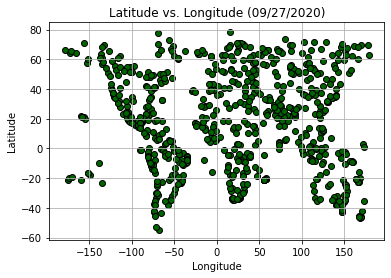

In [22]:
#See the points across the world that we randomly generated
#create the plot
plt.scatter(cleanWeather_df['Longitude'],cleanWeather_df['Latitude'],color='darkgreen',edgecolors='black')

#format axes
plt.title(f"Latitude vs. Longitude ({date})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Latitude_vs_Longitude_DataSet.png"))

#show plot
plt.show()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

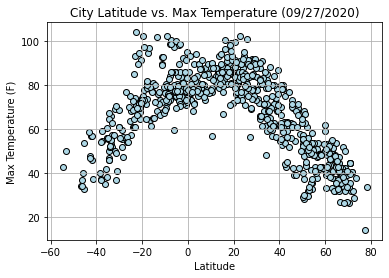

In [23]:
#create the plot
plt.scatter(cleanWeather_df['Latitude'],cleanWeather_df['Max Temp'],color='lightblue',edgecolors='black')

#format axes
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"MaxTemp_vs_Latitude.png"))

#show plot
plt.show()

In [24]:
#Explanation:
# Based on the chart we can see that closer to the equator (Latitude = 0) max temperature increases.
# Towards the poles, north and south (Latitude = 90 and -90), the max temperature is siginificantly lower.

## Latitude vs. Humidity Plot

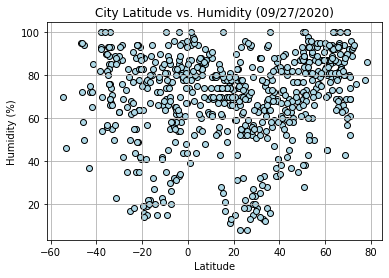

In [25]:
#create the plot
plt.scatter(cleanWeather_df['Latitude'],cleanWeather_df['Humidity'],color='lightblue',edgecolors='black')

#format axes
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Humidity_vs_Latitude.png"))

#show plot
plt.show()

In [26]:
#Explanation:
# The humidity seems to have some range to get lower along latitudes of -25 and 25 ranges.
# Most locations in this dataset have humidities between 60% adn 100% when this data was taken.

## Latitude vs. Cloudiness Plot

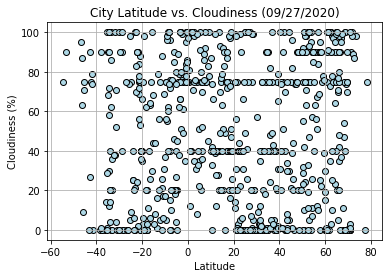

In [32]:
#create the plot
plt.scatter(cleanWeather_df['Latitude'],cleanWeather_df['Cloudiness'],color='lightblue',edgecolors='black')

#format axes
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Cloudiness_vs_Latitude.png"))

#show plot
plt.show()

In [34]:
#Explanation:
# Cloudiness seems to be most consistent around 0%, 40%, ~75%, 100%.
# Doe not seem to be too much correlation along the latitude except for maybe:
#     0% within latitudes [-45,-15] and [20,75]

## Latitude vs. Wind Speed Plot

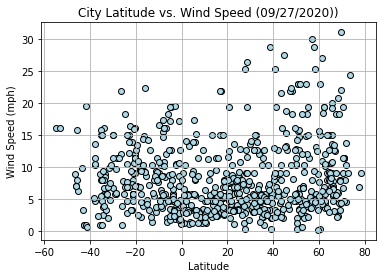

In [35]:
#create the plot
plt.scatter(cleanWeather_df['Latitude'],cleanWeather_df['Wind Speed'],color='lightblue',edgecolors='black')

#format axes
plt.title(f"City Latitude vs. Wind Speed ({date}))")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"WindSpeed_vs_Latitude.png"))

#show plot
plt.show()

In [36]:
#Explanation:
# Wind speed seems to stay relatively below 10 mph at most data points.
# It looks like there might be ever so slight increase of wind speed capabilities as you go farther towards the poles,
# specifically towards the north pole.

## Linear Regression

In [37]:
#seperate northern hemisphere and southern hemisphere data points
northernWeather_df = cleanWeather_df.loc[cleanWeather_df["Latitude"]>=0]
southernWeather_df = cleanWeather_df.loc[cleanWeather_df["Latitude"]<=0]

In [38]:
#slope, intercept, r_value, p_value, std_err = stats.linregress(xaxis, yaxis)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

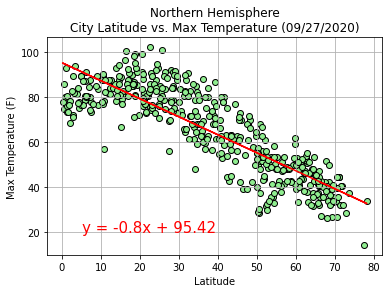

In [39]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northernWeather_df['Latitude'], northernWeather_df['Max Temp'])
regressValues = northernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(northernWeather_df['Latitude'],northernWeather_df['Max Temp'],color='lightgreen',edgecolors='black')
plt.plot(northernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(5,20),fontsize=15,color="red")
plt.title(f"Northern Hemisphere\nCity Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"MaxTemp_vs_Latitude_NorthernHemisphere.png"))

#show plot
plt.show()

In [40]:
#Explanation
# There is a clear trend in the northern hemisphere that closer to the equator (Latitude = 0) it is much higher max 
# temperature and closer to the north pole (Latitude= 90) is much cooler max temperatures.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

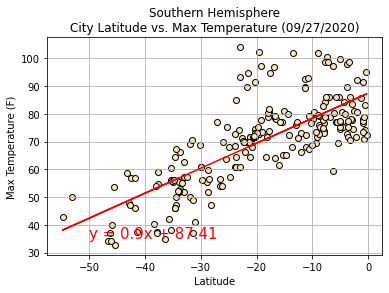

In [41]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southernWeather_df['Latitude'], southernWeather_df['Max Temp'])
regressValues = southernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(southernWeather_df['Latitude'],southernWeather_df['Max Temp'],color='moccasin',edgecolors='black')
plt.plot(southernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(-50,35),fontsize=15,color="red")
plt.title(f"Southern Hemisphere\nCity Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"MaxTemp_vs_Latitude_SouthernHemisphere.png"))

#show plot
plt.show()

In [42]:
#Explanation
# The same is true for the southern hemisphere. Closer to the equator (Latitude = 0) is higher max temperatures while
# closer to the south pole (Latitude = -90) is colder max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

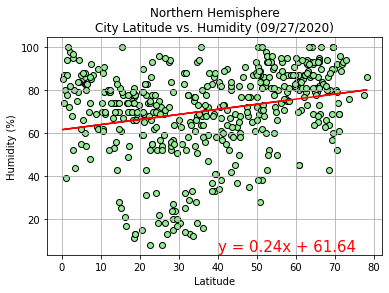

In [47]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northernWeather_df['Latitude'], northernWeather_df['Humidity'])
regressValues = northernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(northernWeather_df['Latitude'],northernWeather_df['Humidity'],color='lightgreen',edgecolors='black')
plt.plot(northernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(40,5),fontsize=15,color="red")
plt.title(f"Northern Hemisphere\nCity Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Humidity_vs_Latitude_NorthernHemisphere.png"))

#show plot
plt.show()

In [48]:
#Explanation
# In the northern hemisphere it seems that there is a cosistent trend of humidity being >75% within this dataset and
# ever so slightly increasing towards the pole.
# Between about latitude [20,60] there is more chance of possible lower humidity than right at the equator or pole.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

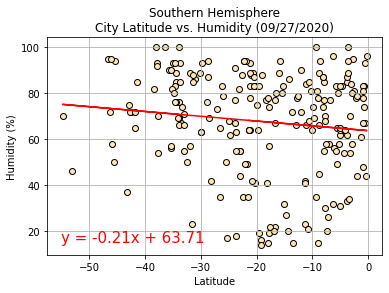

In [51]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southernWeather_df['Latitude'], southernWeather_df['Humidity'])
regressValues = southernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(southernWeather_df['Latitude'],southernWeather_df['Humidity'],color='moccasin',edgecolors='black')
plt.plot(southernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(-55,15),fontsize=15,color="red")
plt.title(f"Southern Hemisphere\nCity Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Humidity_vs_Latitude_SouthernHemisphere.png"))

#show plot
plt.show()

In [52]:
#Explanation
# In the southern hemisphere it seems that there is a cosistent trend of humidity being >75% within this dataset and
# ever so slightly increasing towards the poles.
# Between about latitude [-10,-30] there is more chance of possible lower humidity than right at the equator or pole.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

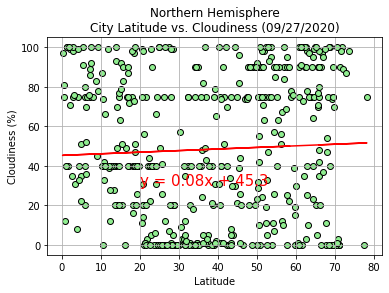

In [53]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northernWeather_df['Latitude'], northernWeather_df['Cloudiness'])
regressValues = northernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(northernWeather_df['Latitude'],northernWeather_df['Cloudiness'],color='lightgreen',edgecolors='black')
plt.plot(northernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(20,30),fontsize=15,color="red")
plt.title(f"Northern Hemisphere\nCity Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Cloudiness_vs_Latitude_NorthernHemisphere.png"))

#show plot
plt.show()

In [54]:
#Explanation
# Based on the dataset there is not much trend of cloudiness in the northern hemisphere.
# It slightly increases the farther from the equator.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

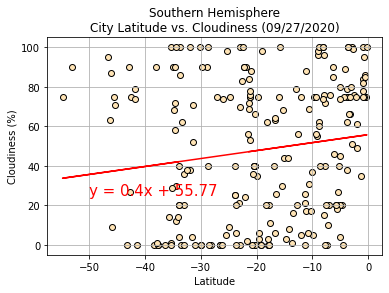

In [56]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southernWeather_df['Latitude'], southernWeather_df['Cloudiness'])
regressValues = southernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(southernWeather_df['Latitude'],southernWeather_df['Cloudiness'],color='moccasin',edgecolors='black')
plt.plot(southernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(-50,25),fontsize=15,color="red")
plt.title(f"Southern Hemisphere\nCity Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Cloudiness_vs_Latitude_SouthernHemisphere.png"))

#show plot
plt.show()

In [57]:
#Explanation
# Based on the dataset there is not much trend of cloudiness in the southern hemisphere.
# It slightly increases the farther from the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

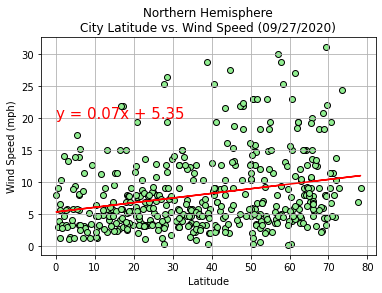

In [64]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northernWeather_df['Latitude'], northernWeather_df['Wind Speed'])
regressValues = northernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(northernWeather_df['Latitude'],northernWeather_df['Wind Speed'],color='lightgreen',edgecolors='black')
plt.plot(northernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(0,20),fontsize=15,color="red")
plt.title(f"Northern Hemisphere\nCity Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"WindSpeed_vs_Latitude_NorthernHemisphere.png"))

#show plot
plt.show()

In [60]:
#Explanation
# Wind speeds also don't have much of a trend in the northern hemisphere.
# There is a slight increase farther from the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

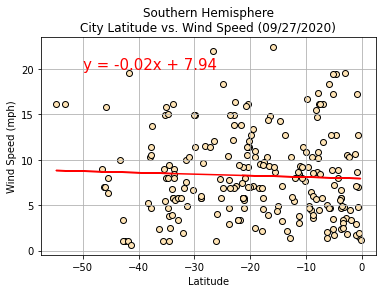

In [65]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southernWeather_df['Latitude'], southernWeather_df['Wind Speed'])
regressValues = southernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(southernWeather_df['Latitude'],southernWeather_df['Wind Speed'],color='moccasin',edgecolors='black')
plt.plot(southernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(-50,20),fontsize=15,color="red")
plt.title(f"Southern Hemisphere\nCity Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"WindSpeed_vs_Latitude_SouthernHemisphere.png"))

#show plot
plt.show()

In [66]:
#Explanation
# Wind speeds also don't have much of a trend in the southern hemisphere, though slightly more than the north.
# There is a slight increase farther from the equator.